![example](images/director_shot.jpeg)

# Project Title

**Authors:** Jordan, Alex, Warren
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

### Look at available data

First, I am looking at the information for each table. I am looking for the number of entries, column names, data types, and how many null values there are. I will not be using the bom.movie_gross data because I am not interested in the studio and the rest of the data is in tn.movies_budgets.

The datasets that I am using are:
    
    - name.basics
    - title.basics
    - title.akas
    - title.crew
    - title.ratings
    - title.principals

What does each dataset contain?
    
    - name.basics
        - nconst: a name id used for merging to other dataframes
        - primary_name: The name associated with each primary profession
        - birth_year: Birth year of primary_name
        - death_year: Death year of primary_name
        - primary_profession: comma separated professions related to the primary_name
        - known_titles: id numbers that represent movies that the primary_name had a part in
        
    - title.basics
        - tconst: a title id used for merging other dataframes
        - primary_title: the movie name
        - original_title: also the movie name
        - start_year: year that the movie was released
        - runtime_minutes: how long the movie is in minutes
        - genres: all of the genres associated with the movie

    These are merged into a dataframe called tcombo
    
    We will be using profit as a metric that we have defined to be $tcombo['worldwide_gross'] - tcombo['production_budget']$
    
    I will be looking at writers vs profit, region vs profit, and release month vs profit
    

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#### Looking at the tables

In [2]:
nb = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
#nb.info()

In [3]:
#nb.head(1)
#actor names, years, profession, titles
#seems less than ideal
#might be able to join known_for_titles with tkas etc

In [4]:
takas = pd.read_csv('data/zippedData/imdb.title.akas.csv.gz')
#takas.info()

In [5]:
#takas.head(1)

In [6]:
tbase = pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
#tbase.columns

In [7]:
#tbase.head(1)
#might try to combine with above on title_id and tconst?

In [8]:
tcrew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
#tcrew.info()

In [9]:
#tcrew.head(1)

In [10]:
tprinc = pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
#tprinc.info()

In [11]:
#tprinc.head(1)
#unsure of what this data is, but looks like tconst can be used to combine

In [12]:
trat = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')
#trat.info()

In [13]:
#trat.head(1)
#combine this rating with tcrew, tbase, takas on tconst column

In [14]:
#tmdb = pd.read_csv('data/tmdb.movies.csv')
#tmdb.info()

#not using tmdb

In [15]:
#tmdb.head(1)

In [16]:
tn = pd.read_csv('data/zippedData/tn.movie_budgets.csv.gz')
#tn.info()

In [17]:
#tn.head(10)
#looks similar to bmg, but has movie name

In [18]:
#nb = pd.read_csv('data/name.basics.csv')
#nb.head()

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

Now that I have looked at all of the information available, I am going to combine some of them into two dataframes.
The first, will be a data frame that contains the title csv's. These will be outer joined on the tconst column so that I don't loose any data. The tconst column is an id for each movie.

Next, I drop rows with null in all columns except the domestic and worldwide gross. It is fine if either domestic_gross or worldwide_gross is zero, but not both. I did not want to drop too much data so this is where I drew the line.

Our target variable is the profit that each movie makes. I added a profit column that is the difference in the worldwide gross and the budget of the film.


The first step is to load in all of the tables that I am using and them merge them together. I used the tconst column and nconst column to merge them. I used an outer merge for all of these so that I don't loose data in this step. Later, I will drop some rows with null values and drop some columns.

I will drop thses columns:
-    'language',
-    'types',
-    'attributes',
-    'is_original_title',
-    'ordering_x',
-    'ordering_y',
-    'original_title',
-    'numvotes',
-    'birth_year',
-    'death_year'

I am still left with a lot of null values so I will drop nulls from the following columns:
-    'tconst',
-    'averagerating',
-    'directors',
-    'writers',
-    'movie',
-    'start_year',
-    'runtime_minutes',
-    'genres',
-    'title',
-    'region',
-    'id',
-    'release_date',
-    'production_budget'

This is where I make sure that the tconst column name is consistient. I had to rename the column in title.akas before merging. I used an outer merge so that I can explicitly drop the data that I don't want.

In [19]:
#rename takas['title_id'] to takas['tconst'] to that we can use it to merge on
takas.rename(columns={'title_id':'tconst'},inplace=True)

In [20]:
#trat join with tcrew, tbase, takas on tconst column
#used outer to keep all data so I can drop later
tcombo = trat.merge(tcrew,how='outer',on='tconst')
tcombo = tcombo.merge(tbase,how='outer',on='tconst')
tcombo = tcombo.merge(takas,how='outer',on='tconst')
tcombo = tcombo.merge(tprinc,how='outer',on='tconst')
tcombo = tcombo.merge(nb,how='outer',on='nconst')
tcombo.head(1)

,tconst,averagerating,numvotes,directors,writers,primary_title,original_title,start_year,runtime_minutes,genres,...,ordering_y,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt10356526,8.3,31.0,nm8353804,"nm3057599,nm4179342",Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance,...,10.0,nm8994524,production_designer,NaN,NaN,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962"


It looks like all the columns are here, but the primary_title column needs to be renamed so we can use it to merge with tn.movie_budgets.

In [21]:
#change tcombo['primary_title'] to movie
tcombo.rename(columns={'primary_title':'movie'},inplace=True)

In [22]:
tcombo = tcombo.merge(tn,how='outer',on='movie')
#tcombo

Look at the columns now. primary_title was changed to movie

In [23]:
tcombo.head(1)

,tconst,averagerating,numvotes,directors,writers,movie,original_title,start_year,runtime_minutes,genres,...,primary_name,birth_year,death_year,primary_profession,known_for_titles,id,release_date,production_budget,domestic_gross,worldwide_gross
0,tt10356526,8.3,31.0,nm8353804,"nm3057599,nm4179342",Laiye Je Yaarian,Laiye Je Yaarian,2019.0,117.0,Romance,...,Kazi Rafik Ali,NaN,NaN,"production_designer,art_department","tt9190740,tt2837596,tt4773212,tt8749962",NaN,NaN,NaN,NaN,NaN


Now its time to drop columns that aren't needed.

In [24]:
#next, look at which rows/columns need to be dropped bc nulls

#drop columns:
tcombo.drop(['language','types','attributes','is_original_title','ordering_x','ordering_y','original_title','numvotes','birth_year','death_year'],axis=1,inplace=True)
#tcombo.info()

I have consolidated the data into a dataframe called tcombo.

After looking at how many null values there are in some of the columns, I am going to see what happens if I get rid of all the rows with any null values from a subset of the columns.

In [25]:
#I am going to not drop null gross rows

tcombo.dropna(subset=['tconst','averagerating','directors','writers','movie','start_year','runtime_minutes','genres','title','region','id','release_date','production_budget'],inplace=True)
tcombo.head(5)

,tconst,averagerating,directors,writers,movie,start_year,runtime_minutes,genres,title,region,...,job,characters,primary_name,primary_profession,known_for_titles,id,release_date,production_budget,domestic_gross,worldwide_gross
470,tt4080386,6.5,nm1819881,"nm6369175,nm3057599",Sardaar Ji,2015.0,141.0,"Comedy,Fantasy,Horror",Sardaar Ji,CA,...,NaN,NaN,Dheeraj Rattan,"writer,director,assistant_director","tt3213204,tt2023645,tt2746136,tt1600439",95.0,"Dec 31, 2015","$2,700,000",$0,"$8,200,000"
473,tt4080386,6.5,nm1819881,"nm6369175,nm3057599",Sardaar Ji,2015.0,141.0,"Comedy,Fantasy,Horror",Sardaar Ji,CA,...,NaN,NaN,Jaswinder Bhalla,"actor,writer","tt2821880,tt2245544,tt3300880,tt3089920",95.0,"Dec 31, 2015","$2,700,000",$0,"$8,200,000"
476,tt4080386,6.5,nm1819881,"nm6369175,nm3057599",Sardaar Ji,2015.0,141.0,"Comedy,Fantasy,Horror",Sardaar Ji,CA,...,producer,NaN,Gunbir Singh Sidhu,producer,"tt3607226,tt2196254,tt2215348,tt6750888",95.0,"Dec 31, 2015","$2,700,000",$0,"$8,200,000"
479,tt4080386,6.5,nm1819881,"nm6369175,nm3057599",Sardaar Ji,2015.0,141.0,"Comedy,Fantasy,Horror",Sardaar Ji,CA,...,NaN,"[""Jaggi""]",Diljit Dosanjh,"actor,music_department,soundtrack","tt4434004,tt5997666,tt7690638,tt7762982",95.0,"Dec 31, 2015","$2,700,000",$0,"$8,200,000"
482,tt4080386,6.5,nm1819881,"nm6369175,nm3057599",Sardaar Ji,2015.0,141.0,"Comedy,Fantasy,Horror",Sardaar Ji,CA,...,NaN,"[""Pinky""]",Neeru Bajwa,"actress,producer,director","tt0400977,tt5313414,tt2196254,tt2673882",95.0,"Dec 31, 2015","$2,700,000",$0,"$8,200,000"


I noticed that there are some duplicates and I will get rid of them in the nect cell.

In [26]:
#I had lots of duplicates so I dropped the dupes in tconst and movie
tcombo.drop_duplicates(subset=['tconst','movie'],inplace=True)
#tcombo.head(5)

Next, I change the data types of the budget and gross columns to be floats. I got rid of the dollar signs and commas and set them to type float.

In [27]:
#change budget and gross types so int
tcombo['production_budget'] = tcombo['production_budget'].map(lambda x: x.replace('$',""))
tcombo['production_budget'] = tcombo['production_budget'].map(lambda x: x.replace(',',""))
tcombo['domestic_gross'] = tcombo['domestic_gross'].map(lambda x: x.replace('$',""))
tcombo['domestic_gross'] = tcombo['domestic_gross'].map(lambda x: x.replace(',',""))
tcombo['worldwide_gross'] = tcombo['worldwide_gross'].map(lambda x: x.replace('$',""))
tcombo['worldwide_gross'] = tcombo['worldwide_gross'].map(lambda x: x.replace(',',""))



I also made a column called release month that I got from the date column.

In [28]:
#making a new column called release month
tcombo['release_month'] = tcombo['release_date'].map(lambda x: x[:3])
#tcombo

In [29]:
#change the types to float
tcombo.production_budget = tcombo.production_budget.astype(float)
tcombo.domestic_gross = tcombo.domestic_gross.astype(float)
tcombo.worldwide_gross = tcombo.worldwide_gross.astype(float)


Check my column types

In [30]:
tcombo.dtypes

tconst                 object
averagerating         float64
directors              object
writers                object
movie                  object
start_year            float64
runtime_minutes       float64
genres                 object
title                  object
region                 object
nconst                 object
category               object
job                    object
characters             object
primary_name           object
primary_profession     object
known_for_titles       object
id                    float64
release_date           object
production_budget     float64
domestic_gross        float64
worldwide_gross       float64
release_month          object
dtype: object

Now it's time to make a profit column

In [31]:
#make profit column
tcombo['profit'] = (tcombo['worldwide_gross'] - tcombo['production_budget'])
#tcombo.head(1)

This is where I pull out the rows where the production budget is not zero and either the domestic or worldwide gross are not zero. This is supposed to prevent too many profit rows from being negative. Otherwise, it looks like a lot of movies lose money.

In [32]:
#drop rows in gross and budget that are zero
tcombo = tcombo.loc[((tcombo['domestic_gross'] != 0) | (tcombo['worldwide_gross'] != 0)) & (tcombo['production_budget'] != 0)]


#what is total US region profit
#protot_US = tcombo['profit'].loc[tcombo['region'] == 'US'].sum()
#protot_US

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***


I would like to visualize some of the data now with some histograms. The goal is to figure out the best way to spent money. So what gives the best results?

- rating for each genre, director, region?
- what is the connection between rating and profit?
- look at total profit for each director, writers, genre, region, release month
- profitable genres for each month

### genre vs rating - Jordan did this one

In [33]:
#tcombo_genre_rating = tcombo[['averagerating','genres']]
#tcombo_genre_rating
#split on ','
#tcombo_genre_rating[:]['genres'] = tcombo_genre_rating['genres'].str.split(',')
#tcombo_genre_rating

In [34]:
#tcombo_genre_profit = tcombo[['genres','profit']]
#tcombo_genre_profit[:]['genres'] = tcombo_genre_profit['genres'].str.split(',')


In [35]:
#np.unique(tcombo_genre_rating['genres'].sum())


In [36]:
#tcombo_genre_rating.genres.value_counts()
#column of lists so its not working
#use .explode
#tcombo_genre_profit = tcombo_genre_profit.explode('genres')
#profit_group = tcombo_genre_profit.groupby(['genres']).sum().sort_values(by='profit',ascending=False)[:10]
#profit_group

In [37]:
#sns.set(rc={'figure.figsize':(15,8)})
#sns.set_theme(context='notebook',style='darkgrid')

#ax = sns.barplot(x=profit_group.index,y='profit',data=profit_group,color='cornflowerblue')

#seems the right order of magnitude so thats a good sign

In [38]:

# tcombo_genre_rating = tcombo_genre_rating.sort_values(by='averagerating',ascending=False)[:11]

# sns.set(rc={'figure.figsize':(15,8)})   

# sns.barplot('genres','averagerating',data=tcombo_genre_rating)

Looks a little like a better rating gives higher profit

In [39]:
#rating and profit
#tcombo_rating_profit = tcombo[['averagerating','profit']]

#fig, ax = plt.subplots(figsize=(15,8))

#x = tcombo_rating_profit['averagerating']
#y = tcombo_rating_profit['profit']

#ax.scatter(x,y)

### director vs profit - I think Jordan did this one too

Here, I'm making a barplot to compare the most profitable directors.

First, I make a new dataframe that contains the director id, profit, primary_name, and primary_profession. The director and primary_profession columns contain string objects with are multiple ids and professions separated by commas. I use .split to turn the data into a list of strings. Then, I call .explode on each list so that there is only one value per row. 

To plot just directors or just writers, I found the rows where the primary_profession was director or writer and made a new dataframe with those values and profit to make the graph with.

In [40]:
tcombo_profession_profit = tcombo[['directors','profit','primary_name','primary_profession']]
tcombo_profession_profit[:]['directors'] = tcombo_profession_profit['directors'].str.split(',')
tcombo_profession_profit[:]['primary_profession'] = tcombo_profession_profit['primary_profession'].str.split(',')
tcombo_profession_profit.head(3)

,directors,profit,primary_name,primary_profession
470,[nm1819881],5500000.0,Dheeraj Rattan,"[writer, director, assistant_director]"
1782,[nm0004541],-4755048.0,Richard Hart,"[producer, editorial_department, miscellaneous]"
1787,[nm0753393],-4755048.0,Joanne Jackson,[producer]


Next, turn the column of lists into multiple rows (one row for each entry in the list)

I also replace the spaces in the primary name column with new lines so that the labels on the barplots look better.

In [41]:
#use .explode

tcombo_profession_profit = tcombo_profession_profit.explode('directors')

#replace spaces with new line so that the names look better on the graphs
tcombo_profession_profit.primary_name = tcombo_profession_profit.primary_name.map(lambda x: x.replace(' ','\n'))


tcombo_profession_profit = tcombo_profession_profit.explode('primary_profession')
tcombo_profession_profit.head(3)

,directors,profit,primary_name,primary_profession
470,nm1819881,5500000.0,Dheeraj\nRattan,writer
470,nm1819881,5500000.0,Dheeraj\nRattan,director
470,nm1819881,5500000.0,Dheeraj\nRattan,assistant_director


Find all rows where the profession column is director

In [42]:
#find all rows where the primary profession is director
director_group = tcombo_profession_profit.loc[tcombo_profession_profit['primary_profession'] == 'director']
director_group = director_group.groupby(['primary_name']).sum().sort_values(by='profit',ascending=False)[:10]
director_group.head(3)

,profit
primary_name,
Jason\nBateman,2.935425e+09
Bryce\nDallas\nHoward,2.853498e+09
Guillermo\ndel\nToro,2.590209e+09


Plot top profitable directors

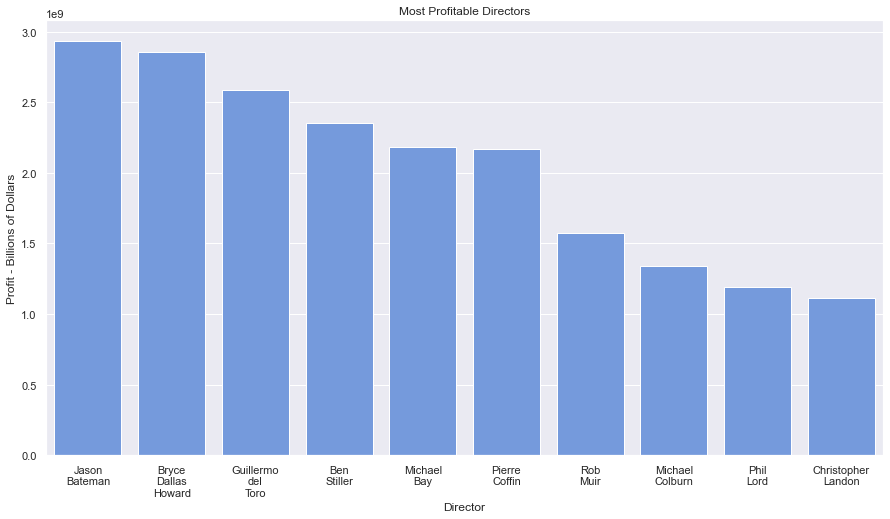

In [43]:
#director and profit
# director_profit


sns.set(rc={'figure.figsize':(15,8)})   

ax = sns.barplot(x=director_group.index,y='profit',data=director_group,color='cornflowerblue')
#these are the directors who bring in the most money

ax.set(xlabel='Director',ylabel='Profit - Billions of Dollars',title='Most Profitable Directors');

### profit vs writer
The next plot was done that same way as above. I isolated the rows where the profession was 'writer' and plotted those in the most profitable movies.

In [44]:
writer_group = tcombo_profession_profit.loc[tcombo_profession_profit['primary_profession'] == 'writer']

writer_group = writer_group.groupby(['primary_name']).sum().sort_values(by='profit',ascending=False)[:10]
writer_group.head(3)

,profit
primary_name,
Jack\nKirby,9.364316e+09
Steve\nCarell,5.694658e+09
Bryce\nDallas\nHoward,2.853498e+09


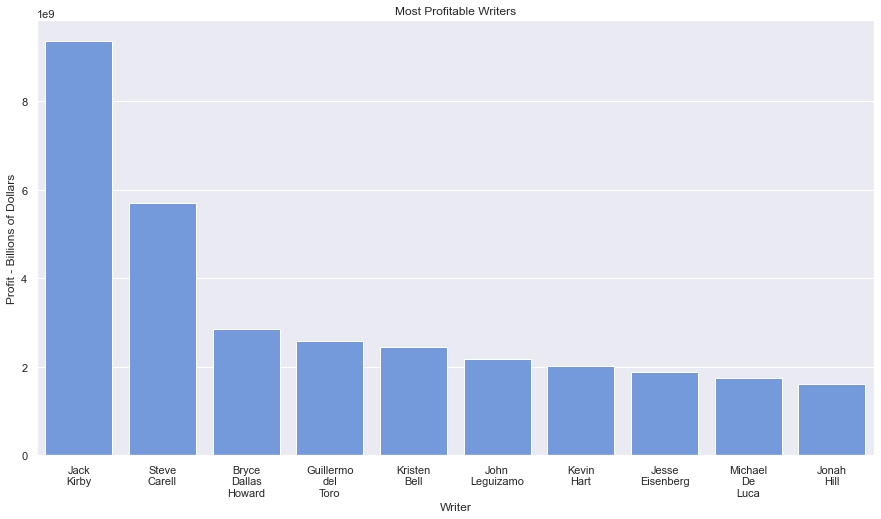

In [45]:

sns.set(rc={'figure.figsize':(15,8)})   

ax = sns.barplot(x=writer_group.index,y='profit',data=writer_group,color='cornflowerblue')

ax.set(xlabel='Writer',ylabel='Profit - Billions of Dollars',title='Most Profitable Writers');

### profit vs region

This is a bar plot of the regions where movies made the most money. I found a dictionary of country codes and their country names. I used it to map the country names in place of the codes in the region column. This makes the plot labels more meaningful.

#### Country Code Dictionary

I found a dictionary of country codes so I can map them and use the actual country name on the graph.

In [46]:
CC = {
    "AF": "AFGHANISTAN",
    "AX": "ÅLAND ISLANDS",
    "AL": "ALBANIA",
    "DZ": "ALGERIA",
    "AS": "AMERICAN SAMOA",
    "AD": "ANDORRA",
    "AO": "ANGOLA",
    "AI": "ANGUILLA",
    "AQ": "ANTARCTICA",
    "AG": "ANTIGUA AND BARBUDA",
    "AR": "ARGENTINA",
    "AM": "ARMENIA",
    "AW": "ARUBA",
    "AU": "AUSTRALIA",
    "AT": "AUSTRIA",
    "AZ": "AZERBAIJAN",
    "BS": "BAHAMAS",
    "BH": "BAHRAIN",
    "BD": "BANGLADESH",
    "BB": "BARBADOS",
    "BY": "BELARUS",
    "BE": "BELGIUM",
    "BZ": "BELIZE",
    "BJ": "BENIN",
    "BM": "BERMUDA",
    "BT": "BHUTAN",
    "BO": "BOLIVIA, PLURINATIONAL STATE OF",
    "BQ": "BONAIRE, SINT EUSTATIUS AND SABA",
    "BA": "BOSNIA AND HERZEGOVINA",
    "BW": "BOTSWANA",
    "BV": "BOUVET ISLAND",
    "BR": "BRAZIL",
    "IO": "BRITISH INDIAN OCEAN TERRITORY",
    "BN": "BRUNEI DARUSSALAM",
    "BG": "BULGARIA",
    "BF": "BURKINA FASO",
    "BI": "BURUNDI",
    "KH": "CAMBODIA",
    "CM": "CAMEROON",
    "CA": "CANADA",
    "CV": "CAPE VERDE",
    "KY": "CAYMAN ISLANDS",
    "CF": "CENTRAL AFRICAN REPUBLIC",
    "TD": "CHAD",
    "CL": "CHILE",
    "CN": "CHINA",
    "CX": "CHRISTMAS ISLAND",
    "CC": "COCOS (KEELING) ISLANDS",
    "CO": "COLOMBIA",
    "KM": "COMOROS",
    "CG": "CONGO",
    "CD": "CONGO, THE DEMOCRATIC REPUBLIC OF THE",
    "CK": "COOK ISLANDS",
    "CR": "COSTA RICA",
    "CI": "CÔTE D'IVOIRE",
    "HR": "CROATIA",
    "CU": "CUBA",
    "CW": "CURAÇAO",
    "CY": "CYPRUS",
    "CZ": "CZECH REPUBLIC",
    "DK": "DENMARK",
    "DJ": "DJIBOUTI",
    "DM": "DOMINICA",
    "DO": "DOMINICAN REPUBLIC",
    "EC": "ECUADOR",
    "EG": "EGYPT",
    "SV": "EL SALVADOR",
    "GQ": "EQUATORIAL GUINEA",
    "ER": "ERITREA",
    "EE": "ESTONIA",
    "ET": "ETHIOPIA",
    "FK": "FALKLAND ISLANDS (MALVINAS)",
    "FO": "FAROE ISLANDS",
    "FJ": "FIJI",
    "FI": "FINLAND",
    "FR": "FRANCE",
    "GF": "FRENCH GUIANA",
    "PF": "FRENCH POLYNESIA",
    "TF": "FRENCH SOUTHERN TERRITORIES",
    "GA": "GABON",
    "GM": "GAMBIA",
    "GE": "GEORGIA",
    "DE": "GERMANY",
    "GH": "GHANA",
    "GI": "GIBRALTAR",
    "GR": "GREECE",
    "GL": "GREENLAND",
    "GD": "GRENADA",
    "GP": "GUADELOUPE",
    "GU": "GUAM",
    "GT": "GUATEMALA",
    "GG": "GUERNSEY",
    "GN": "GUINEA",
    "GW": "GUINEA-BISSAU",
    "GY": "GUYANA",
    "HT": "HAITI",
    "HM": "HEARD ISLAND AND MCDONALD ISLANDS",
    "VA": "HOLY SEE (VATICAN CITY STATE)",
    "HN": "HONDURAS",
    "HK": "HONG KONG",
    "HU": "HUNGARY",
    "IS": "ICELAND",
    "IN": "INDIA",
    "ID": "INDONESIA",
    "IR": "IRAN, ISLAMIC REPUBLIC OF",
    "IQ": "IRAQ",
    "IE": "IRELAND",
    "IM": "ISLE OF MAN",
    "IL": "ISRAEL",
    "IT": "ITALY",
    "JM": "JAMAICA",
    "JP": "JAPAN",
    "JE": "JERSEY",
    "JO": "JORDAN",
    "KZ": "KAZAKHSTAN",
    "KE": "KENYA",
    "KI": "KIRIBATI",
    "KP": "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF",
    "KR": "KOREA, REPUBLIC OF",
    "KW": "KUWAIT",
    "KG": "KYRGYZSTAN",
    "LA": "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
    "LV": "LATVIA",
    "LB": "LEBANON",
    "LS": "LESOTHO",
    "LR": "LIBERIA",
    "LY": "LIBYA",
    "LI": "LIECHTENSTEIN",
    "LT": "LITHUANIA",
    "LU": "LUXEMBOURG",
    "MO": "MACAO",
    "MK": "MACEDONIA, THE FORMER YUGOSLAV REPUBLIC OF",
    "MG": "MADAGASCAR",
    "MW": "MALAWI",
    "MY": "MALAYSIA",
    "MV": "MALDIVES",
    "ML": "MALI",
    "MT": "MALTA",
    "MH": "MARSHALL ISLANDS",
    "MQ": "MARTINIQUE",
    "MR": "MAURITANIA",
    "MU": "MAURITIUS",
    "YT": "MAYOTTE",
    "MX": "MEXICO",
    "FM": "MICRONESIA, FEDERATED STATES OF",
    "MD": "MOLDOVA, REPUBLIC OF",
    "MC": "MONACO",
    "MN": "MONGOLIA",
    "ME": "MONTENEGRO",
    "MS": "MONTSERRAT",
    "MA": "MOROCCO",
    "MZ": "MOZAMBIQUE",
    "MM": "MYANMAR",
    "NA": "NAMIBIA",
    "NR": "NAURU",
    "NP": "NEPAL",
    "NL": "NETHERLANDS",
    "NC": "NEW CALEDONIA",
    "NZ": "NEW ZEALAND",
    "NI": "NICARAGUA",
    "NE": "NIGER",
    "NG": "NIGERIA",
    "NU": "NIUE",
    "NF": "NORFOLK ISLAND",
    "MP": "NORTHERN MARIANA ISLANDS",
    "NO": "NORWAY",
    "OM": "OMAN",
    "PK": "PAKISTAN",
    "PW": "PALAU",
    "PS": "PALESTINE, STATE OF",
    "PA": "PANAMA",
    "PG": "PAPUA NEW GUINEA",
    "PY": "PARAGUAY",
    "PE": "PERU",
    "PH": "PHILIPPINES",
    "PN": "PITCAIRN",
    "PL": "POLAND",
    "PT": "PORTUGAL",
    "PR": "PUERTO RICO",
    "QA": "QATAR",
    "RE": "RÉUNION",
    "RO": "ROMANIA",
    "RU": "RUSSIAN FEDERATION",
    "RW": "RWANDA",
    "BL": "SAINT BARTHÉLEMY",
    "SH": "SAINT HELENA, ASCENSION AND TRISTAN DA CUNHA",
    "KN": "SAINT KITTS AND NEVIS",
    "LC": "SAINT LUCIA",
    "MF": "SAINT MARTIN (FRENCH PART)",
    "PM": "SAINT PIERRE AND MIQUELON",
    "VC": "SAINT VINCENT AND THE GRENADINES",
    "WS": "SAMOA",
    "SM": "SAN MARINO",
    "ST": "SAO TOME AND PRINCIPE",
    "SA": "SAUDI ARABIA",
    "SN": "SENEGAL",
    "RS": "SERBIA",
    "SC": "SEYCHELLES",
    "SL": "SIERRA LEONE",
    "SG": "SINGAPORE",
    "SX": "SINT MAARTEN (DUTCH PART)",
    "SK": "SLOVAKIA",
    "SI": "SLOVENIA",
    "SB": "SOLOMON ISLANDS",
    "SO": "SOMALIA",
    "ZA": "SOUTH AFRICA",
    "GS": "SOUTH GEORGIA AND THE SOUTH SANDWICH ISLANDS",
    "SS": "SOUTH SUDAN",
    "ES": "SPAIN",
    "LK": "SRI LANKA",
    "SD": "SUDAN",
    "SR": "SURINAME",
    "SJ": "SVALBARD AND JAN MAYEN",
    "SZ": "SWAZILAND",
    "SE": "SWEDEN",
    "CH": "SWITZERLAND",
    "SY": "SYRIAN ARAB REPUBLIC",
    "TW": "TAIWAN, PROVINCE OF CHINA",
    "TJ": "TAJIKISTAN",
    "TZ": "TANZANIA, UNITED REPUBLIC OF",
    "TH": "THAILAND",
    "TL": "TIMOR-LESTE",
    "TG": "TOGO",
    "TK": "TOKELAU",
    "TO": "TONGA",
    "TT": "TRINIDAD AND TOBAGO",
    "TN": "TUNISIA",
    "TR": "TURKEY",
    "TM": "TURKMENISTAN",
    "TC": "TURKS AND CAICOS ISLANDS",
    "TV": "TUVALU",
    "UG": "UGANDA",
    "UA": "UKRAINE",
    "AE": "UNITED ARAB EMIRATES",
    "GB": "UNITED KINGDOM",
    "US": "UNITED STATES",
    "UM": "UNITED STATES MINOR OUTLYING ISLANDS",
    "UY": "URUGUAY",
    "UZ": "UZBEKISTAN",
    "VU": "VANUATU",
    "VE": "VENEZUELA, BOLIVARIAN REPUBLIC OF",
    "VN": "VIET NAM",
    "VG": "VIRGIN ISLANDS, BRITISH",
    "VI": "VIRGIN ISLANDS, U.S.",
    "WF": "WALLIS AND FUTUNA",
    "EH": "WESTERN SAHARA",
    "YE": "YEMEN",
    "ZM": "ZAMBIA",
    "ZW": "ZIMBABWE",
}

### Region Plot

A barplot of the profitable regions (countries)

Below is where I do the actual mapping with a lambda function.

In [47]:
tcombo_profit_region = tcombo[['profit','region']].sort_values(by='profit',ascending=False)[:12]

#map cCodes to tcombo_profit_region
tcombo_profit_region['region'] = tcombo_profit_region['region'].map(lambda x: CC[x].title())
tcombo_profit_region.head(3)

,profit,region
1627549,2.351345e+09,Japan
994040,1.748134e+09,Argentina
58632,1.433855e+09,Bulgaria


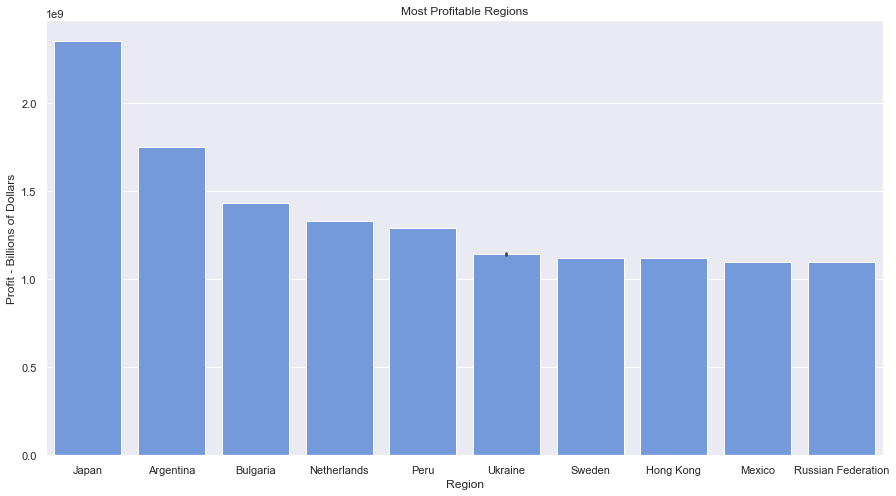

In [48]:
sns.set_theme(context='notebook',style="darkgrid")

sns.set(rc={'figure.figsize':(15,8)})   

ax = sns.barplot(x='region',y='profit',data=tcombo_profit_region,color='cornflowerblue')

ax.set(xlabel='Region',ylabel='Profit - Billions of Dollars',title='Most Profitable Regions');

### Actors and actresses in the most profitable movies

This is a subplot with two plots. The first shows actors and the second shows actresses. I first got just the rows where the profession was either actor or actress and made them their own dataframes. Then, I grouped them by the name of the person and summed the profits of all the movies they were in. Next, I sorted the people by the profit and selected the top 10. After that, I just plotted the top actors and actresses in the most profitable movies.

In [49]:
actor_group = tcombo_profession_profit.loc[tcombo_profession_profit['primary_profession'] == 'actor']
actor_group = actor_group.groupby(['primary_name']).sum().sort_values(by='profit',ascending=False)[:5]

actress_group = tcombo_profession_profit.loc[tcombo_profession_profit['primary_profession'] == 'actress']
actress_group = actress_group.groupby(['primary_name']).sum().sort_values(by='profit',ascending=False)[:5]


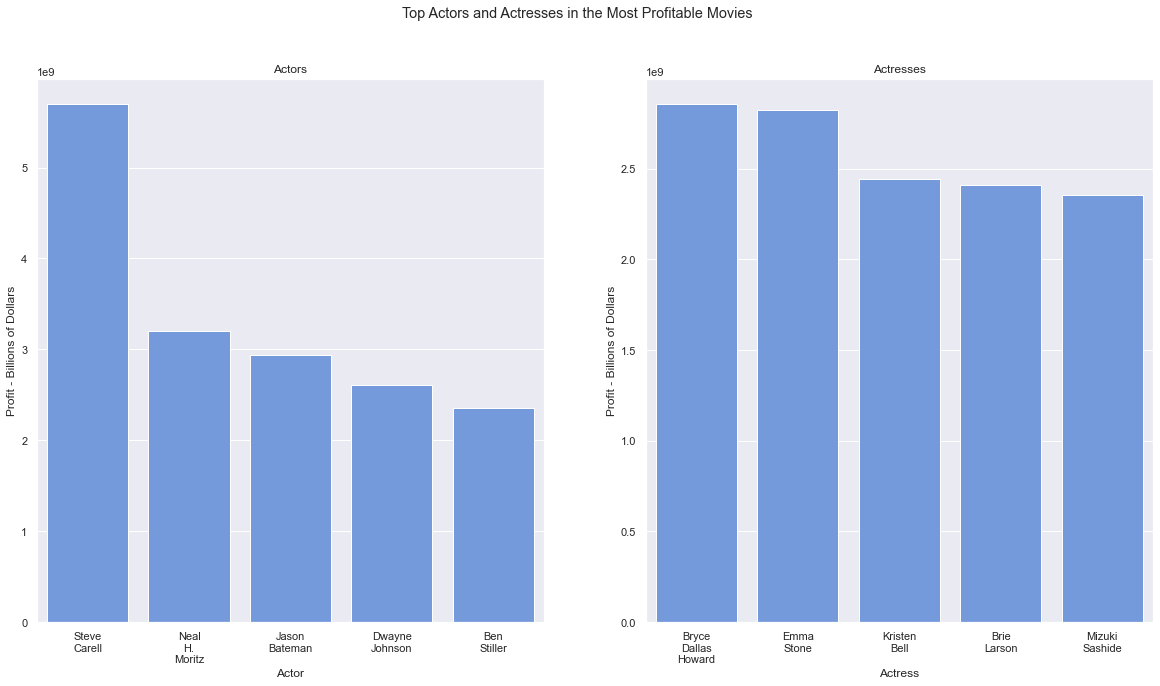

In [50]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
fig.suptitle('Top Actors and Actresses in the Most Profitable Movies')

sns.barplot(ax=axes[0],x=actor_group.index,y='profit',data=actor_group,color='cornflowerblue')
axes[0].set(xlabel='Actor',ylabel='Profit - Billions of Dollars',title='Actors')

sns.barplot(ax=axes[1],x=actress_group.index,y='profit',data=actress_group,color='cornflowerblue')
axes[1].set(xlabel='Actress',ylabel='Profit - Billions of Dollars',title='Actresses');


### Release month vs profit

The first plot shows the total profit made per release month. The second shows the total number of movies released per month. I suspected that the beginning of the summer would be where the most money was made and when most movies were released. It looks like June movies made the most money, December has the higher number of movies released.

I should look into the best genres the release per month.

#### 

[Text(0.5, 0, 'Month of Release'),
 Text(0, 0.5, 'Profit - Billions of Dollars'),
 Text(0.5, 1.0, 'Most Profitable Release Month')]

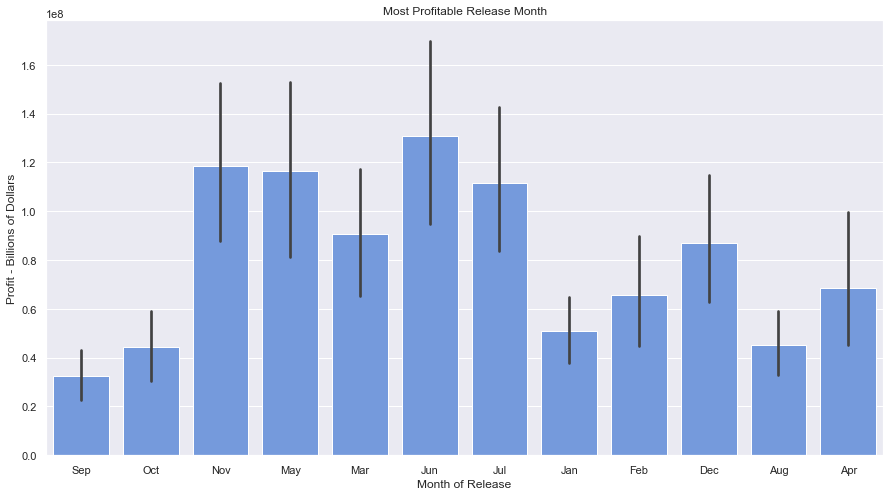

In [51]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#sort months so they are in order
tcombo[:]['release_month'] = pd.Categorical(tcombo['release_month'], month_order)

tcombo = tcombo.sort_values(by='release_month',ascending=False)

sns.set(rc={'figure.figsize':(15,8)})   

ax = sns.barplot(x='release_month',y='profit',data=tcombo,color='cornflowerblue')
#I think this plot gives the average profits per month

ax.set(xlabel='Month of Release',ylabel='Profit - Billions of Dollars',title='Most Profitable Release Month')

[Text(0.5, 0, 'Release Month'),
 Text(0, 0.5, 'Number of Movies Released'),
 Text(0.5, 1.0, 'Movies Released per Month')]

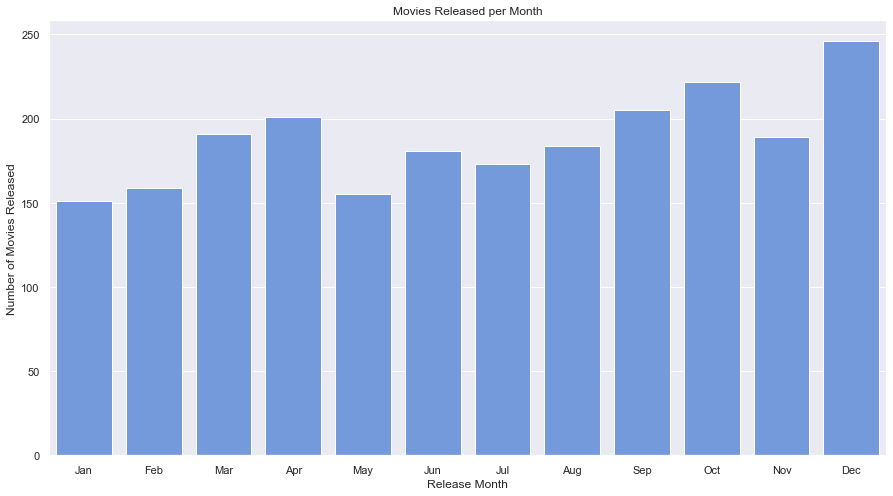

In [52]:
#months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
#sort months so they are in order
tcombo['release_month'] = pd.Categorical(tcombo['release_month'], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])

tcombo = tcombo.sort_values(by='release_month',ascending=False)

sns.set(rc={'figure.figsize':(15,8)})   

ax = sns.countplot(x='release_month',data=tcombo,color='cornflowerblue')
#how many movies are released each month

ax.set(xlabel='Release Month',ylabel='Number of Movies Released',title='Movies Released per Month')

#### Best Movie Genres to Release per Month

First, I make a new dataframe with the genres, release months, and profits. The genres are in a comma separated string so I split them on the comma and then use .explode on the lists so that each genre is in its own column.

In [53]:
release_genre = tcombo[['genres','release_month','profit']]
release_genre[:]['genres'] = release_genre['genres'].str.split(',')
release_genre = release_genre.explode('genres')

release_genre.dropna(axis=0,how='any',subset=['profit'],inplace=True)
release_genre.head(3)

,genres,release_month,profit
544510,Biography,Dec,18717667.0
544510,Comedy,Dec,18717667.0
544510,Drama,Dec,18717667.0


I wrote a function to give a dataframe of profits by genre for any month passed to the function. I layed out my logic below.

In [54]:
#laying out logic for function below

# jan_profit = release_genre.loc[release_genre['release_month'] == 'Jan']

# jan_profit = jan_profit.groupby(['release_month','genres']).sum()
# jan_profit.dropna(axis=0,how='any',subset=['profit'],inplace=True)

# jan_profit.sort_values(by='profit',ascending=False)

In [55]:
#returns the profit of each genre sorted descending for the given month
def month_profit(month,release_genre):
    month_profit = release_genre.loc[release_genre['release_month'] == month]
    
    #removed this line so that it is not grouped by release month anymore
    #    month_profit = month_profit.groupby(['release_month','genres']).sum()
    
    month_profit = month_profit.groupby(['genres']).sum()
    month_profit.dropna(axis=0,how='any',subset=['profit'],inplace=True)
    
    month_profit = month_profit.sort_values(by='profit',ascending=False)
    
    return month_profit

I was testing the output of the function so that I could use it in a for loop.

In [56]:
df=month_profit('Jan',release_genre)

# fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(20,10))
# fig.suptitle('Top Actors and Actresses in the Most Profitable Movies')

# sns.barplot(ax=axes[0],x=actor_group.index,y='profit',data=actor_group,color='cornflowerblue')
# axes[0].set(xlabel='Actor',ylabel='Profit - Billions of Dollars',title='Actors')

# sns.barplot(ax=axes[1],x=actress_group.index,y='profit',data=actress_group,color='cornflowerblue')
# axes[1].set(xlabel='Actress',ylabel='Profit - Billions of Dollars',title='Actresses')
# mi = pd.MultiIndex.from_frame(df)
# mi.to_frame(index=True)

#df


This loop makes a separate plot of genre profits for each month. I iterated through a list that I had already made called month_order. I was using it before to define the order of months in a barplot.

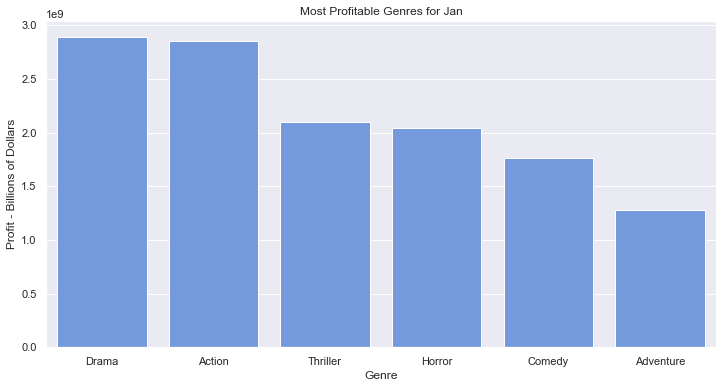

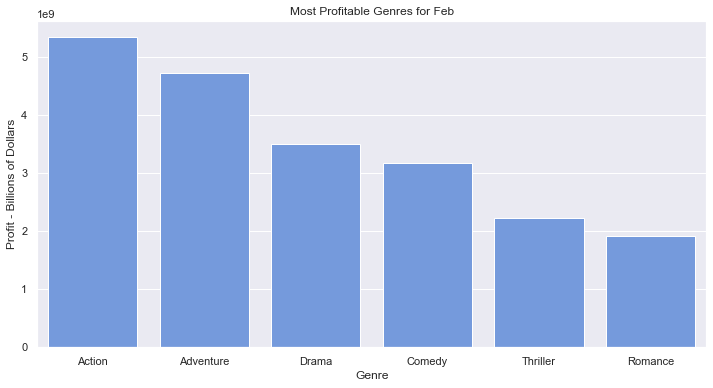

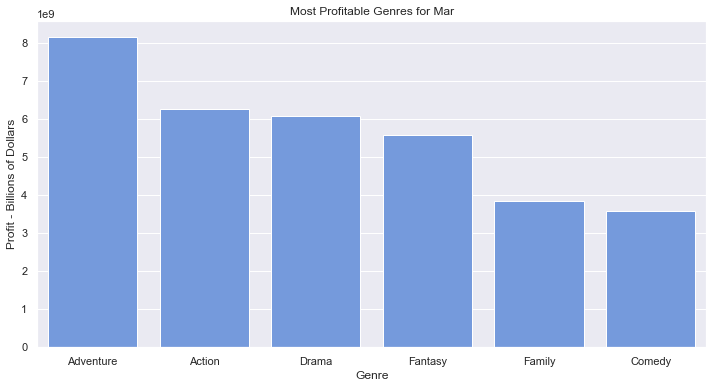

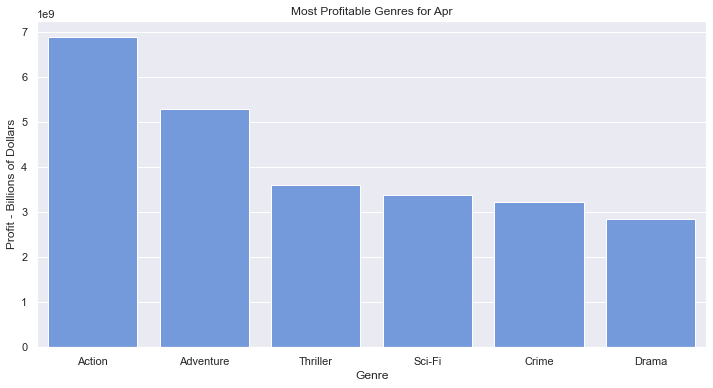

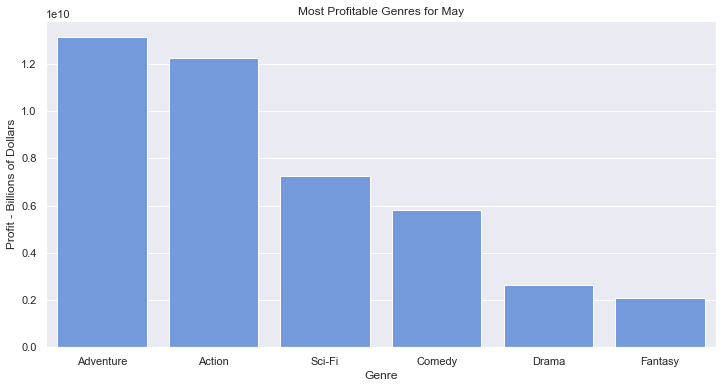

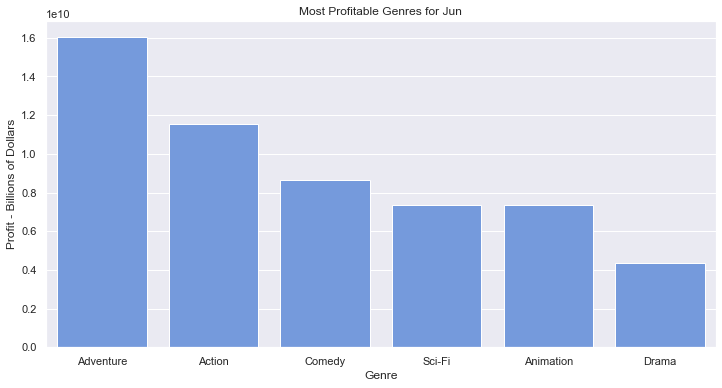

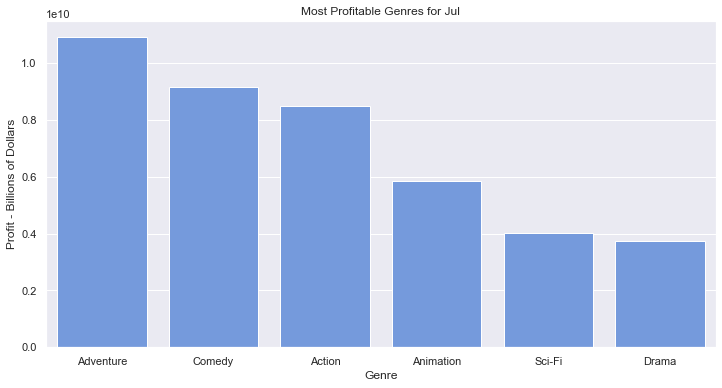

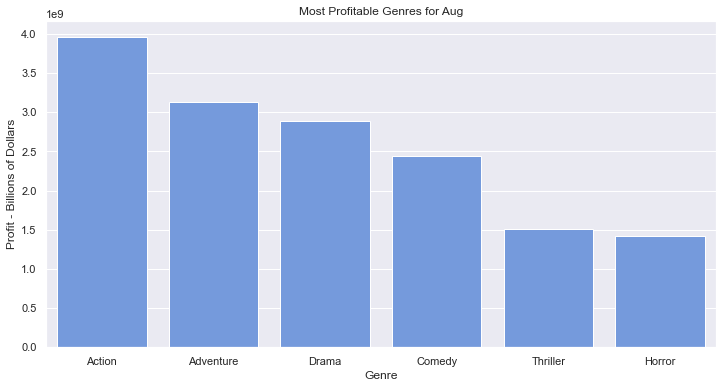

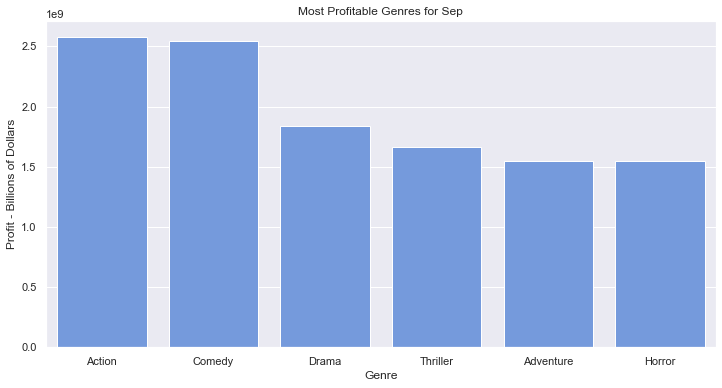

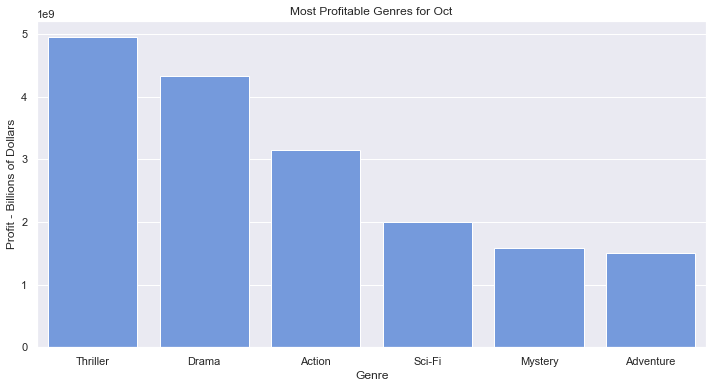

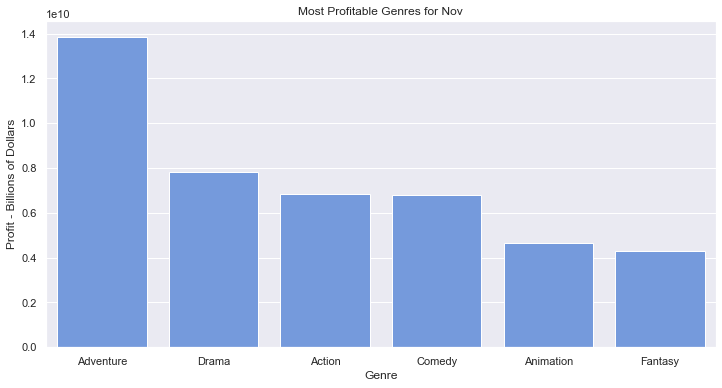

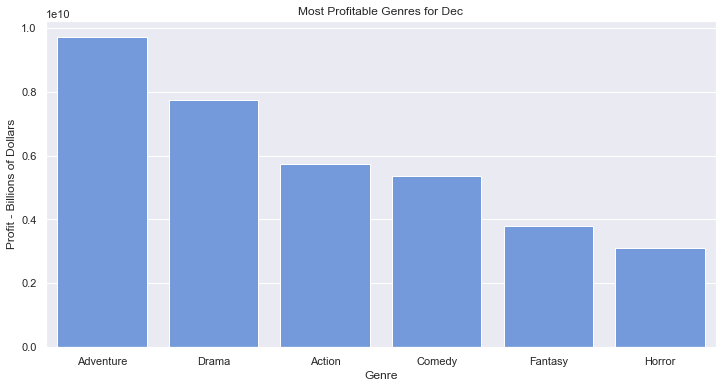

In [57]:
#trying to multi index to get 'genres' from df in the loop.



for month in month_order:
    
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(12,6))

    
    df=month_profit(month,release_genre)
    df = df[:6]
    #print(df)
    #print(df.index)
    
    ax = sns.barplot(x=df.index,y='profit',data=df,color='cornflowerblue')
    ax.set(xlabel='Genre',ylabel='Profit - Billions of Dollars',title=f'Most Profitable Genres for {month.title()}')
    


It is interesting to see which genres are most profitable per month. For example: October-Thriller ; February-Romance is 5th

Maybe October is spooky month, February is romance month, and everything else is action/adventure.

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***